In [185]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(2017)

In [175]:
def n(digits=3):
    number = ''
    for i in range(np.random.randint(1, digits +1)):
        number += np.random.choice(list('0123456789'))
    return int(number)



In [176]:
def padding(chars, maxlen):
    return chars + ' ' * (maxlen-len(chars))

In [177]:
digits = 3
input_digits = digits * 2 + 1
output_digits = digits + 1

added = set()
questions = []
answers = []


In [178]:
while len(questions) < N:
    a, b = n(), n()
    pair = tuple(sorted((a,b)))
    if pair in added:
        continue
        
    question = '{}+{}'.format(a,b)
    question = padding(question, input_digits)
    answer = str(a + b)
    answer = padding(answer, output_digits)
    
    added.add(pair)
    questions.append(question)
    answers.append(answer)
    

In [179]:
chars = '0123456789+ '
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))


In [180]:
n_in = len(chars)
n_hidden = 128
n_out = len(chars)

N = 20000
N_validation = N - N_train

In [181]:
X = np.zeros((len(questions), input_digits, len(chars)), dtype=np.integer)
Y = np.zeros((len(questions), digits +1, len(chars)), dtype=np.integer)

for i in range(N):
    for t, char in enumerate(questions[i]):
        X[i, t, char_indices[str(char)]] = 1
    for t, char in enumerate(answers[i]):
        Y[i, t, char_indices[char]] = 1
        
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y)

In [182]:
model = Sequential()

# 인코더
model.add(LSTM(n_hidden, input_shape=(input_digits, n_in)))

# 디코더
model.add(RepeatVector(output_digits))

model.add(LSTM(n_hidden, return_sequences=True))

model.add(TimeDistributed(Dense(n_out)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])

In [183]:
epochs = 200
batch_size = 200


history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, batch_size=batch_size
              validation_data=(X_validation, Y_validation))

# 검증 데이터에서 무작위로 문제를 선택해서 답을 맞춘다
    for i in range(10):
        index = np.random.randint(0, N_validation)
        question = X_validation[np.array([index])]
        answer = Y_validation[np.array([index])]
        prediction = model.predict_classes(question, verbose=0)

        question = question.argmax(axis=-1)
        answer = answer.argmax(axis=-1)

        q = ''.join(indices_char[i] for i in question[0])
        a = ''.join(indices_char[i] for i in answer[0])
        p = ''.join(indices_char[i] for i in prediction[0])

        print('-' * 10)
        print('Q:  ', q)
        print('A:  ', p)
        print('T/F:', end=' ')
        if a == p:
            print('T')
        else:
            print('F')
    print('-' * 10)

    

Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 6s - loss: 2.0743 - acc: 0.2821 - val_loss: 1.8355 - val_acc: 0.3516
----------
Q:   105+45 
A:   114 
T/F: F
----------
Q:   0+955  
A:   114 
T/F: F
----------
Q:   421+115
A:   114 
T/F: F
----------
Q:   62+92  
A:   11  
T/F: F
----------
Q:   556+4  
A:   11  
T/F: F
----------
Q:   51+65  
A:   11  
T/F: F
----------
Q:   266+346
A:   114 
T/F: F
----------
Q:   45+661 
A:   114 
T/F: F
----------
Q:   666+844
A:   114 
T/F: F
----------
Q:   2+196  
A:   114 
T/F: F
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 1.8095 - acc: 0.3495 - val_loss: 1.7852 - val_acc: 0.3520
----------
Q:   357+95 
A:   116 
T/F: F
----------
Q:   515+68 
A:   116 
T/F: F
----------
Q:   76+15  
A:   11  
T/F: F
----------
Q:   837+11 
A:   116 
T/F: F
----------
Q:   430+3  
A:   13  
T/F: F
----------
Q:   753+667


15000/15000 [==============================] - 5s - loss: 1.4937 - acc: 0.4489 - val_loss: 1.4781 - val_acc: 0.4531
----------
Q:   977+5  
A:   976 
T/F: F
----------
Q:   558+71 
A:   537 
T/F: F
----------
Q:   716+64 
A:   736 
T/F: F
----------
Q:   16+15  
A:   11  
T/F: F
----------
Q:   681+55 
A:   631 
T/F: F
----------
Q:   84+48  
A:   442 
T/F: F
----------
Q:   726+607
A:   1334
T/F: F
----------
Q:   192+3  
A:   113 
T/F: F
----------
Q:   422+46 
A:   455 
T/F: F
----------
Q:   72+96  
A:   176 
T/F: F
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 1.4443 - acc: 0.4696 - val_loss: 1.4401 - val_acc: 0.4703
----------
Q:   278+3  
A:   381 
T/F: F
----------
Q:   236+9  
A:   335 
T/F: F
----------
Q:   629+533
A:   118 
T/F: F
----------
Q:   80+53  
A:   135 
T/F: F
----------
Q:   12+90  
A:   100 
T/F: F
----------
Q:   4+6    
A:   6   
T/F: F
----------
Q:   827+760
A:   1585
T/F: F
-

15000/15000 [==============================] - 5s - loss: 0.9780 - acc: 0.6407 - val_loss: 1.0016 - val_acc: 0.6275
----------
Q:   12+57  
A:   68  
T/F: F
----------
Q:   49+593 
A:   641 
T/F: F
----------
Q:   37+69  
A:   105 
T/F: F
----------
Q:   963+78 
A:   1060
T/F: F
----------
Q:   397+8  
A:   497 
T/F: F
----------
Q:   919+980
A:   1880
T/F: F
----------
Q:   81+619 
A:   771 
T/F: F
----------
Q:   963+78 
A:   1060
T/F: F
----------
Q:   86+89  
A:   176 
T/F: F
----------
Q:   703+96 
A:   781 
T/F: F
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 0.9460 - acc: 0.6539 - val_loss: 0.9909 - val_acc: 0.6252
----------
Q:   47+73  
A:   110 
T/F: F
----------
Q:   12+90  
A:   101 
T/F: F
----------
Q:   85+518 
A:   610 
T/F: F
----------
Q:   881+603
A:   1599
T/F: F
----------
Q:   969+400
A:   1486
T/F: F
----------
Q:   379+6  
A:   384 
T/F: F
----------
Q:   453+27 
A:   489 
T/F: F
-

15000/15000 [==============================] - 5s - loss: 0.5257 - acc: 0.8223 - val_loss: 0.5937 - val_acc: 0.7760
----------
Q:   35+246 
A:   281 
T/F: T
----------
Q:   91+8   
A:   99  
T/F: T
----------
Q:   9+29   
A:   48  
T/F: F
----------
Q:   22+929 
A:   941 
T/F: F
----------
Q:   3+610  
A:   613 
T/F: T
----------
Q:   47+57  
A:   104 
T/F: T
----------
Q:   89+502 
A:   590 
T/F: F
----------
Q:   960+348
A:   1277
T/F: F
----------
Q:   908+6  
A:   914 
T/F: T
----------
Q:   65+974 
A:   1040
T/F: F
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 0.5039 - acc: 0.8304 - val_loss: 0.5789 - val_acc: 0.7824
----------
Q:   89+77  
A:   166 
T/F: T
----------
Q:   7+605  
A:   622 
T/F: F
----------
Q:   67+64  
A:   131 
T/F: T
----------
Q:   776+505
A:   1219
T/F: F
----------
Q:   9+549  
A:   558 
T/F: T
----------
Q:   389+8  
A:   397 
T/F: T
----------
Q:   480+386
A:   869 
T/F: F
-

15000/15000 [==============================] - 5s - loss: 0.2624 - acc: 0.9328 - val_loss: 0.3553 - val_acc: 0.8781
----------
Q:   6+874  
A:   880 
T/F: T
----------
Q:   450+0  
A:   440 
T/F: F
----------
Q:   2+64   
A:   66  
T/F: T
----------
Q:   558+71 
A:   619 
T/F: F
----------
Q:   75+52  
A:   127 
T/F: T
----------
Q:   533+37 
A:   560 
T/F: F
----------
Q:   62+16  
A:   78  
T/F: T
----------
Q:   7+3    
A:   10  
T/F: T
----------
Q:   238+6  
A:   244 
T/F: T
----------
Q:   20+16  
A:   26  
T/F: F
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 0.2480 - acc: 0.9382 - val_loss: 0.3407 - val_acc: 0.8843
----------
Q:   674+402
A:   1077
T/F: F
----------
Q:   521+35 
A:   556 
T/F: T
----------
Q:   63+469 
A:   532 
T/F: T
----------
Q:   918+45 
A:   963 
T/F: T
----------
Q:   404+99 
A:   503 
T/F: T
----------
Q:   649+629
A:   1278
T/F: T
----------
Q:   0+592  
A:   592 
T/F: T
-

15000/15000 [==============================] - 5s - loss: 0.1400 - acc: 0.9715 - val_loss: 0.2621 - val_acc: 0.9059
----------
Q:   411+981
A:   1412
T/F: F
----------
Q:   652+62 
A:   713 
T/F: F
----------
Q:   9+331  
A:   330 
T/F: F
----------
Q:   50+371 
A:   421 
T/F: T
----------
Q:   350+572
A:   933 
T/F: F
----------
Q:   546+155
A:   701 
T/F: T
----------
Q:   34+387 
A:   421 
T/F: T
----------
Q:   26+50  
A:   76  
T/F: T
----------
Q:   7+3    
A:   10  
T/F: T
----------
Q:   280+945
A:   1244
T/F: F
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 0.1343 - acc: 0.9730 - val_loss: 0.2471 - val_acc: 0.9152
----------
Q:   1+727  
A:   728 
T/F: T
----------
Q:   27+886 
A:   913 
T/F: T
----------
Q:   355+612
A:   877 
T/F: F
----------
Q:   957+6  
A:   963 
T/F: T
----------
Q:   976+15 
A:   990 
T/F: F
----------
Q:   964+84 
A:   1048
T/F: T
----------
Q:   405+9  
A:   414 
T/F: T
-

15000/15000 [==============================] - 5s - loss: 0.0744 - acc: 0.9891 - val_loss: 0.2097 - val_acc: 0.9258
----------
Q:   48+741 
A:   789 
T/F: T
----------
Q:   2+918  
A:   910 
T/F: F
----------
Q:   418+813
A:   1242
T/F: F
----------
Q:   947+2  
A:   949 
T/F: T
----------
Q:   857+211
A:   1078
T/F: F
----------
Q:   37+26  
A:   63  
T/F: T
----------
Q:   931+2  
A:   933 
T/F: T
----------
Q:   84+911 
A:   995 
T/F: T
----------
Q:   912+167
A:   1089
T/F: F
----------
Q:   84+87  
A:   171 
T/F: T
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 0.0710 - acc: 0.9905 - val_loss: 0.2051 - val_acc: 0.9258
----------
Q:   849+4  
A:   853 
T/F: T
----------
Q:   95+358 
A:   443 
T/F: F
----------
Q:   801+115
A:   996 
T/F: F
----------
Q:   355+28 
A:   383 
T/F: T
----------
Q:   431+1  
A:   432 
T/F: T
----------
Q:   27+358 
A:   385 
T/F: T
----------
Q:   95+474 
A:   579 
T/F: F
-

15000/15000 [==============================] - 5s - loss: 0.0393 - acc: 0.9977 - val_loss: 0.1863 - val_acc: 0.9346
----------
Q:   591+319
A:   909 
T/F: F
----------
Q:   12+626 
A:   638 
T/F: T
----------
Q:   919+120
A:   1049
T/F: F
----------
Q:   49+46  
A:   95  
T/F: T
----------
Q:   43+777 
A:   820 
T/F: T
----------
Q:   723+573
A:   1296
T/F: T
----------
Q:   432+84 
A:   516 
T/F: T
----------
Q:   70+145 
A:   215 
T/F: T
----------
Q:   4+499  
A:   503 
T/F: T
----------
Q:   0+42   
A:   42  
T/F: T
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 0.0378 - acc: 0.9975 - val_loss: 0.1894 - val_acc: 0.9347
----------
Q:   1+29   
A:   30  
T/F: T
----------
Q:   529+0  
A:   529 
T/F: T
----------
Q:   92+941 
A:   1033
T/F: T
----------
Q:   11+416 
A:   427 
T/F: T
----------
Q:   32+655 
A:   687 
T/F: T
----------
Q:   0+152  
A:   162 
T/F: F
----------
Q:   171+592
A:   764 
T/F: F
-

15000/15000 [==============================] - 5s - loss: 0.0225 - acc: 0.9996 - val_loss: 0.1794 - val_acc: 0.9390
----------
Q:   190+356
A:   545 
T/F: F
----------
Q:   59+50  
A:   109 
T/F: T
----------
Q:   841+817
A:   1657
T/F: F
----------
Q:   199+6  
A:   205 
T/F: T
----------
Q:   62+141 
A:   203 
T/F: T
----------
Q:   423+998
A:   1431
T/F: F
----------
Q:   61+574 
A:   635 
T/F: T
----------
Q:   385+82 
A:   467 
T/F: T
----------
Q:   423+998
A:   1431
T/F: F
----------
Q:   876+73 
A:   949 
T/F: T
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 0.0213 - acc: 0.9996 - val_loss: 0.1808 - val_acc: 0.9396
----------
Q:   12+626 
A:   638 
T/F: T
----------
Q:   195+141
A:   345 
T/F: F
----------
Q:   369+4  
A:   373 
T/F: T
----------
Q:   273+14 
A:   287 
T/F: T
----------
Q:   39+435 
A:   474 
T/F: T
----------
Q:   51+37  
A:   88  
T/F: T
----------
Q:   28+44  
A:   72  
T/F: T
-

15000/15000 [==============================] - 5s - loss: 0.0129 - acc: 0.9999 - val_loss: 0.1910 - val_acc: 0.9383
----------
Q:   113+97 
A:   210 
T/F: T
----------
Q:   78+727 
A:   805 
T/F: T
----------
Q:   938+131
A:   1059
T/F: F
----------
Q:   103+1  
A:   104 
T/F: T
----------
Q:   32+2   
A:   34  
T/F: T
----------
Q:   41+48  
A:   89  
T/F: T
----------
Q:   90+693 
A:   773 
T/F: F
----------
Q:   63+433 
A:   496 
T/F: T
----------
Q:   11+74  
A:   85  
T/F: T
----------
Q:   6+809  
A:   815 
T/F: T
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 0.0124 - acc: 1.0000 - val_loss: 0.1938 - val_acc: 0.9369
----------
Q:   0+917  
A:   917 
T/F: T
----------
Q:   893+916
A:   1809
T/F: T
----------
Q:   1+42   
A:   43  
T/F: T
----------
Q:   0+952  
A:   952 
T/F: T
----------
Q:   81+91  
A:   172 
T/F: T
----------
Q:   695+962
A:   1667
T/F: F
----------
Q:   265+37 
A:   302 
T/F: T
-

15000/15000 [==============================] - 5s - loss: 0.0086 - acc: 1.0000 - val_loss: 0.1823 - val_acc: 0.9418
----------
Q:   3+920  
A:   923 
T/F: T
----------
Q:   41+13  
A:   54  
T/F: T
----------
Q:   558+80 
A:   638 
T/F: T
----------
Q:   957+72 
A:   1029
T/F: T
----------
Q:   622+3  
A:   625 
T/F: T
----------
Q:   65+136 
A:   201 
T/F: T
----------
Q:   418+813
A:   1232
T/F: F
----------
Q:   0+952  
A:   952 
T/F: T
----------
Q:   350+487
A:   827 
T/F: F
----------
Q:   11+74  
A:   85  
T/F: T
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 0.0083 - acc: 1.0000 - val_loss: 0.1828 - val_acc: 0.9417
----------
Q:   7+305  
A:   312 
T/F: T
----------
Q:   542+253
A:   805 
T/F: F
----------
Q:   6+883  
A:   899 
T/F: F
----------
Q:   168+89 
A:   257 
T/F: T
----------
Q:   775+76 
A:   841 
T/F: F
----------
Q:   499+3  
A:   502 
T/F: T
----------
Q:   49+457 
A:   506 
T/F: T
-

15000/15000 [==============================] - 5s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.1912 - val_acc: 0.9409
----------
Q:   918+45 
A:   963 
T/F: T
----------
Q:   364+68 
A:   432 
T/F: T
----------
Q:   256+0  
A:   256 
T/F: T
----------
Q:   0+772  
A:   772 
T/F: T
----------
Q:   429+62 
A:   591 
T/F: F
----------
Q:   170+47 
A:   217 
T/F: T
----------
Q:   246+2  
A:   248 
T/F: T
----------
Q:   2+673  
A:   675 
T/F: T
----------
Q:   732+284
A:   1005
T/F: F
----------
Q:   606+2  
A:   608 
T/F: T
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 6s - loss: 0.0051 - acc: 1.0000 - val_loss: 0.1949 - val_acc: 0.9404
----------
Q:   0+636  
A:   636 
T/F: T
----------
Q:   41+917 
A:   958 
T/F: T
----------
Q:   9+888  
A:   897 
T/F: T
----------
Q:   86+159 
A:   245 
T/F: T
----------
Q:   695+962
A:   1667
T/F: F
----------
Q:   129+53 
A:   183 
T/F: F
----------
Q:   351+7  
A:   358 
T/F: T
-

15000/15000 [==============================] - 5s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.2016 - val_acc: 0.9399
----------
Q:   572+859
A:   1420
T/F: F
----------
Q:   8+503  
A:   511 
T/F: T
----------
Q:   910+74 
A:   984 
T/F: T
----------
Q:   267+79 
A:   346 
T/F: T
----------
Q:   77+848 
A:   925 
T/F: T
----------
Q:   73+14  
A:   87  
T/F: T
----------
Q:   33+678 
A:   711 
T/F: T
----------
Q:   917+1  
A:   918 
T/F: T
----------
Q:   329+17 
A:   346 
T/F: T
----------
Q:   0+786  
A:   786 
T/F: T
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.2039 - val_acc: 0.9391
----------
Q:   932+9  
A:   941 
T/F: T
----------
Q:   227+81 
A:   308 
T/F: T
----------
Q:   23+10  
A:   33  
T/F: T
----------
Q:   376+28 
A:   404 
T/F: T
----------
Q:   900+99 
A:   999 
T/F: T
----------
Q:   385+56 
A:   441 
T/F: T
----------
Q:   889+133
A:   1032
T/F: F
-

15000/15000 [==============================] - 5s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.1855 - val_acc: 0.9420
----------
Q:   6+585  
A:   591 
T/F: T
----------
Q:   770+4  
A:   774 
T/F: T
----------
Q:   1+949  
A:   950 
T/F: T
----------
Q:   46+12  
A:   68  
T/F: F
----------
Q:   26+50  
A:   76  
T/F: T
----------
Q:   551+6  
A:   557 
T/F: T
----------
Q:   46+956 
A:   1002
T/F: T
----------
Q:   278+4  
A:   282 
T/F: T
----------
Q:   621+52 
A:   673 
T/F: T
----------
Q:   281+38 
A:   319 
T/F: T
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 0.0041 - acc: 1.0000 - val_loss: 0.1856 - val_acc: 0.9414
----------
Q:   642+211
A:   853 
T/F: T
----------
Q:   168+89 
A:   257 
T/F: T
----------
Q:   57+987 
A:   1044
T/F: T
----------
Q:   991+717
A:   1707
T/F: F
----------
Q:   537+7  
A:   544 
T/F: T
----------
Q:   778+0  
A:   778 
T/F: T
----------
Q:   536+8  
A:   544 
T/F: T
-

15000/15000 [==============================] - 4s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.1942 - val_acc: 0.9412
----------
Q:   900+37 
A:   947 
T/F: F
----------
Q:   301+675
A:   976 
T/F: T
----------
Q:   771+471
A:   1223
T/F: F
----------
Q:   109+704
A:   813 
T/F: T
----------
Q:   882+2  
A:   884 
T/F: T
----------
Q:   43+183 
A:   216 
T/F: F
----------
Q:   58+35  
A:   93  
T/F: T
----------
Q:   45+92  
A:   137 
T/F: T
----------
Q:   87+347 
A:   434 
T/F: T
----------
Q:   260+386
A:   636 
T/F: F
----------
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 5s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.1952 - val_acc: 0.9416
----------
Q:   59+170 
A:   229 
T/F: T
----------
Q:   95+36  
A:   131 
T/F: T
----------
Q:   36+727 
A:   763 
T/F: T
----------
Q:   963+78 
A:   1041
T/F: T
----------
Q:   0+143  
A:   143 
T/F: T
----------
Q:   41+812 
A:   853 
T/F: T
----------
Q:   50+405 
A:   455 
T/F: T
-

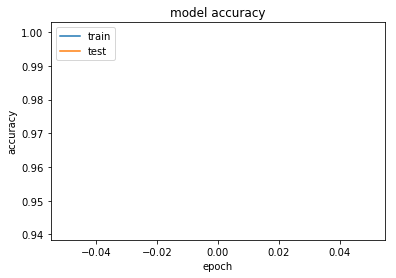

In [186]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()